In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


-0.000680914368842427

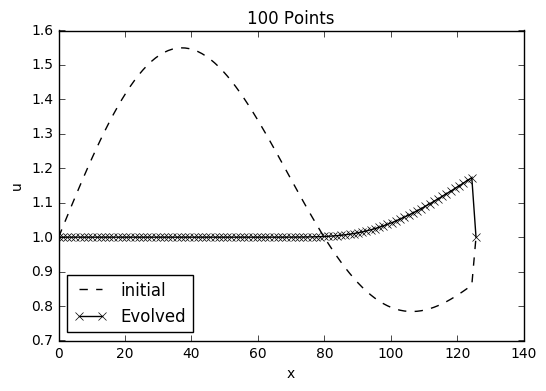

In [2]:
nx = 100
nt = 100000
x = np.linspace(0, 40 * np.pi, nx)


u = 1 + 0.3 * np.sin(x/20) + 0.3 * np.sin(x/35)
u[-1] = 1
u0 = u.copy()
dx = x[1] - x[0]
sigma = .0009
dt = .001
nu = np.ones(x.size) * 1e-6 + 1e-4 * np.sin(x / 10) + 1e-6 * np.sin(x / 20) + 1e-6 * np.sin(x / 30)
u_record = np.zeros((nx, 500))

ii = 0
for _ in range(nt):
    un = u.copy()
    u[1:-1] = un[1:-1] + dt *( -1 * un[1:-1] * (un[1:-1] - un[:-2]) / dx + nu[1:-1] * (u[2:] - 2 * u[1:-1] + u[:-2]) / dx**2 )
    if _ % (200) == 0:
        u_record[:, ii] = u
        ii += 1
    
plt.plot(x, u0, ls='--', c='k', label="initial")
plt.plot(x, u, c='k', label="Evolved", marker='x')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_useOffset(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.legend(loc="lower left")
ax.set_title("%i Points"%nx)
ax.set_ylabel("u")
ax.set_xlabel('x')
np.mean(np.gradient(u, dx))


In [11]:
a = np.dot(u_record.T, u_record)
a.shape

(500, 500)

In [143]:
P, D, Q = np.linalg.svd(a, full_matrices=True) # P D Q is the approximation
np.allclose(a, np.dot(P * D, Q)) # check that a = P D Q
# Nicholas says that P is the eigenectors and Q is the coefficients. So take that with a grain of salt.

True

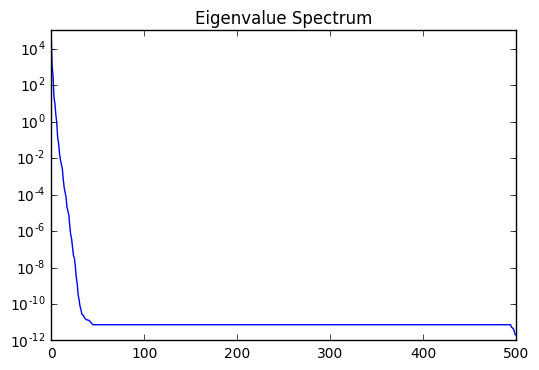

In [182]:
# plot eigenvalues
plt.plot(D)
plt.yscale('log')
plt.title("Eigenvalue Spectrum")

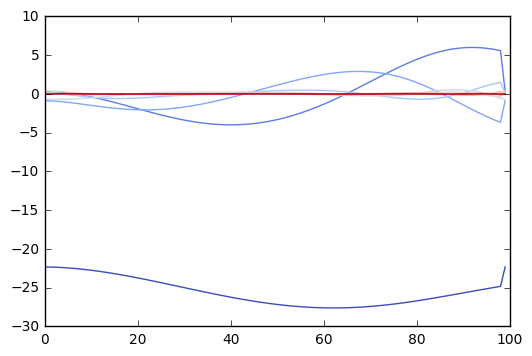

In [188]:
# The columns of phi are the basis functions, right?

phi = np.dot(u_record, P)

# normalize phi
#for i in range(len(phi[1, :])):
#    phi[:, i] = phi[:, i] / np.sum(phi[:, i])

# plot first 10 functions
colors = plt.cm.coolwarm(np.arange(10) / 9.)
for i in range(10): plt.plot(phi[:, i], c=colors[i])

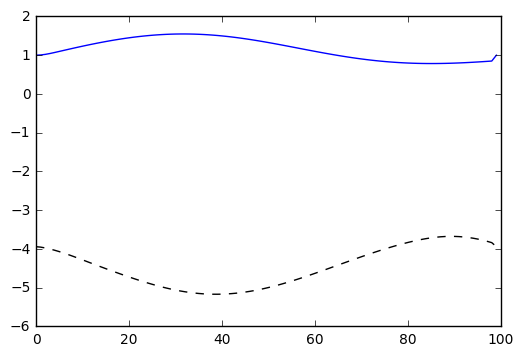

In [189]:
# plot the snapshot at time 10
plt.plot(u_record[:, 10])

# reconstruct the snapshot using phi
ubar = np.dot(Q, phi.T)
plt.plot(ubar.T[:, 10], c='k', ls='--')
#plt.ylim(0,2)